In [1]:
!pip install mglearn
import mglearn
import numpy as np

     |████████████████████████████████| 540 kB 5.4 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=2c61f23076f9e94f765b3c9fd3b4afdb3c69e44f377a403d2271ee0ca9a57f21
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


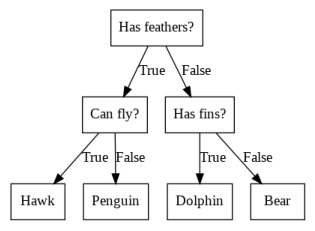

In [2]:
mglearn.plots.plot_animal_tree()

## Decision tree using pre-pruning

**Without a specific depth**

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print(f'Accuracy on training set: {tree.score(X_train, y_train):.3f}')
print(f'Accuracy on test set: {tree.score(X_test, y_test):.3f}')

Accuracy on training set: 1.000
Accuracy on test set: 0.937


**With a max depth of 4**

In [6]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print(f'Accuray on training set: {tree.score(X_test, y_test):.3f}')
print(f'Accuracy on test set: {tree.score(X_test, y_test):.3f}')

Accuray on training set: 0.951
Accuracy on test set: 0.951


# Analyzing and visualizing decision trees

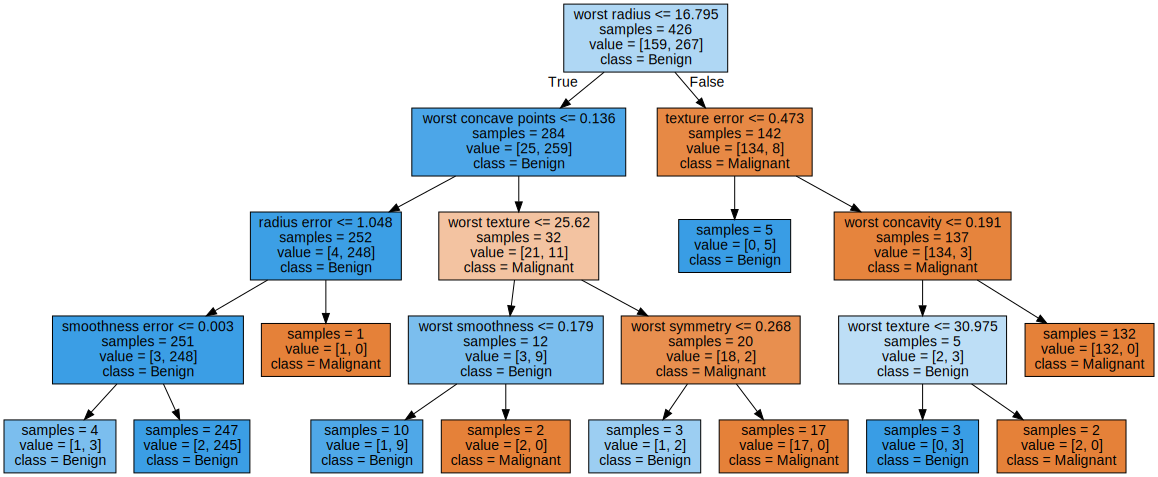

In [7]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file='tree.dot', class_names=['Malignant', 'Benign'], feature_names=cancer.feature_names, impurity=False, filled=True)

with open('tree.dot') as f:
  dot_graph = f.read()

graphviz.Source(dot_graph)

# Feature importance in trees

In [8]:
print(f'Feature importance: \n{tree.feature_importances_}')

Feature importance: 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


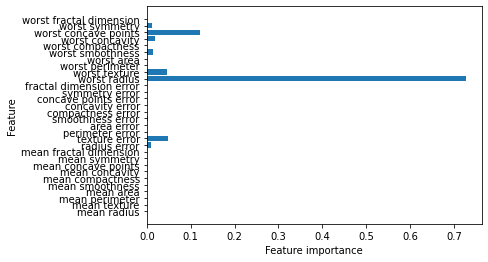

In [9]:
import matplotlib.pyplot as plt

def plot_feature_importance(model):
  n_features = cancer.data.shape[1]
  plt.barh(range(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.xlabel('Feature importance')
  plt.ylabel('Feature')

plot_feature_importance(tree)

Feature importances: [0. 1.]


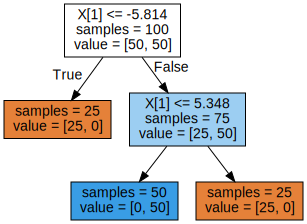

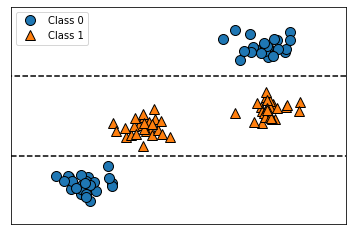

In [10]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

# Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

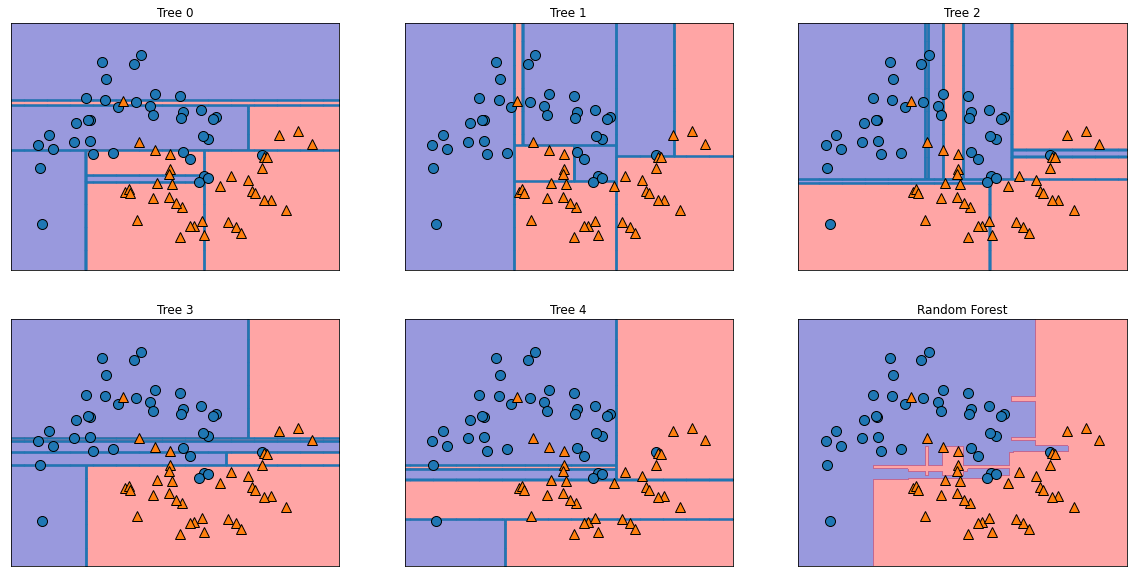

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
  ax.set_title(f'Tree {i}')
  mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=0.4)
axes[-1, -1].set_title('Random Forest')
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print(f'Accuracy on training set: {forest.score(X_train, y_train):.3f}')
print(f'Accuracy on test set: {forest.score(X_test, y_test):.3f}')

Accuracy on training set: 1.000
Accuracy on test set: 0.972


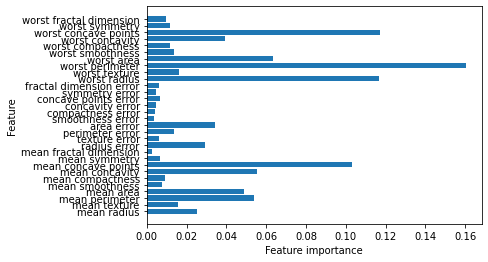

In [17]:
plot_feature_importance(forest)